# ADA Assignment 2

- Sampad Kumar Kar
- MCS202215

# 0. Imports

In [48]:
# for file handling
import os, sys

# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Loading

In [21]:
# .xlxs sheets converted to .csv file

data_path_1 = os.path.join('data', 'raw', 'Fablink-cleanedup_Fab1001-401.csv')
data_path_2 = os.path.join('data', 'raw', 'Fablink-cleanedup_Fab1002-401.csv')

df1 = pd.read_csv(data_path_1)
df2 = pd.read_csv(data_path_2)

# 2. `df1`

In [12]:
df1.head()

,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,octets,lastOctetval,Octet-diff,Utilization,datetime
0,1001,1/1,spine,40G,401,1/49,leaf,864504425592799,859365645174667,5138780418132,453.77,13/5/2022
1,1001,1/1,spine,40G,401,1/49,leaf,869309684178755,864504425592799,4805258585956,424.32,14/5/2022
2,1001,1/1,spine,40G,401,1/49,leaf,874373310562711,869309684178755,5063626383956,447.13,15/5/2022
3,1001,1/1,spine,40G,401,1/49,leaf,879933845908609,874373310562711,5560535345898,491.01,16/5/2022
4,1001,1/1,spine,40G,401,1/49,leaf,885694021578201,879933845908609,5760175669592,508.64,17/5/2022


In [14]:
print("The shape of the data is: ", df1.shape)

The shape of the data is:  (70, 12)


In [16]:
df1.columns

Index(['source_node', 'source_port', 'source_type', 'operSpeed',
       'destination_node', 'destination_port', 'destination_type', 'octets',
       'lastOctetval', 'Octet-diff', 'Utilization', 'datetime'],
      dtype='object')

In [22]:
# filter out the dataframe to store only the required columns, i.e. 'datetime' and 'Utilization'

df1 = df1[['datetime', 'Utilization']]

# convert the 'datetime' column to datetime format
df1['datetime'] = pd.to_datetime(df1['datetime'])

df1.head()

/var/folders/xr/w_ff5mfj28v5_lpz552bj4zm0000gn/T/ipykernel_3722/2438006576.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['datetime'] = pd.to_datetime(df1['datetime'])


,datetime,Utilization
0,2022-05-13,453.77
1,2022-05-14,424.32
2,2022-05-15,447.13
3,2022-05-16,491.01
4,2022-05-17,508.64


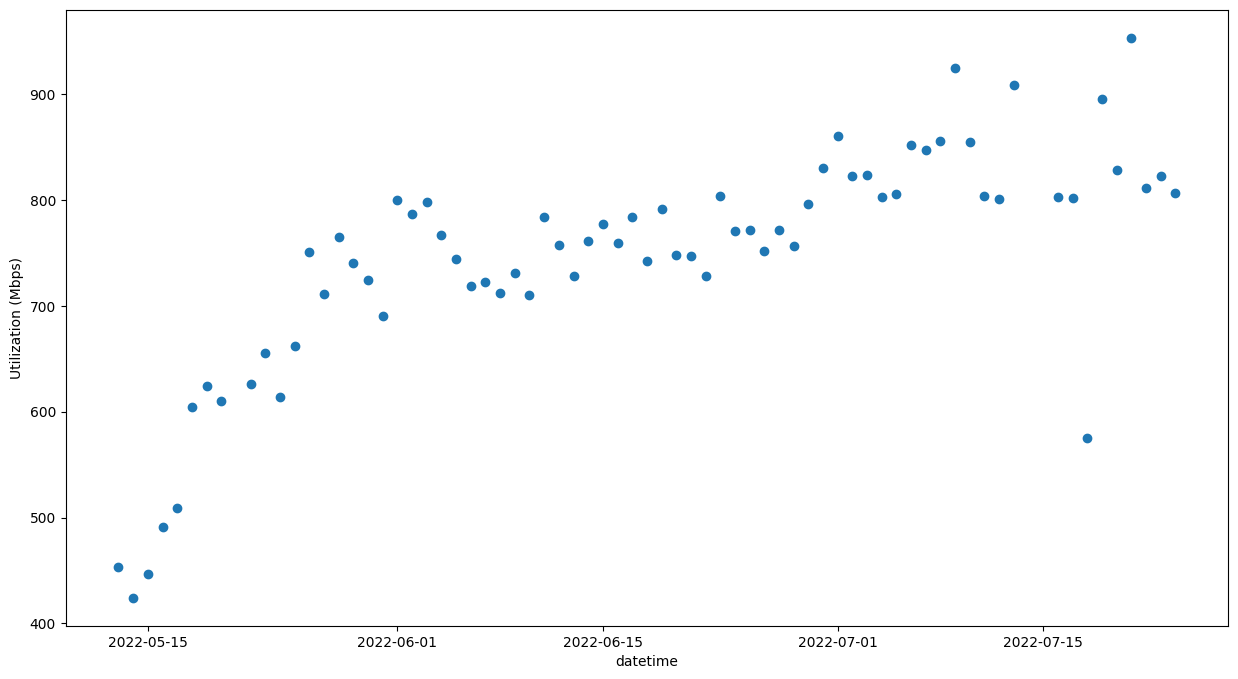

In [30]:
# we first plot the data in a scatter plot ('Utilization' vs 'datetime') to see the trend

plt.figure(figsize=(15, 8))
plt.scatter(df1['datetime'], df1['Utilization'])
plt.xlabel('datetime')
plt.ylabel('Utilization (Mbps)')
plt.show()

The data seems to have a linear trend, `Utilization` seems to be increasing linearly with time. We try to fit a linear regression model to the data by using the current day of the year as independent variable.

## 2.1 Preprocessing

In [31]:
# add a new column 'doy' to represent the day of the year corresponding to the 'datetime' column

df1['doy'] = df1['datetime'].dt.dayofyear

df1.head()

,datetime,Utilization,doy
0,2022-05-13,453.77,133
1,2022-05-14,424.32,134
2,2022-05-15,447.13,135
3,2022-05-16,491.01,136
4,2022-05-17,508.64,137


Since, we are fitting a simple Linear Regression Model, scaling is unnecessary. So, we directly move on to fit the model.

## 2.2 Linear Regression

In [43]:
model_1 = LinearRegression()

# fit the model on the data
model_1.fit(df1[['doy']], df1['Utilization'])

LinearRegression()

In [41]:
# print the coefficients and intercept of the model

print("The coefficient of the model is: ", model_1.coef_.item())
print("The intercept of the model is: ", model_1.intercept_)

The coefficient of the model is:  3.8781432728837326
The intercept of the model is:  91.85555233725074


## 2.3 Results

In [50]:
# print the R2 Score, MSE and RMSE of the model

y_true_1 = df1['Utilization']
y_pred_1 = model_1.predict(df1[['doy']])

print("The R2 Score of the model is: ", r2_score(y_true_1, y_pred_1))
print("The MSE of the model is: ", mean_squared_error(y_true_1, y_pred_1))
print("The RMSE of the model is: ", mean_squared_error(y_true_1, y_pred_1, squared=False))

The R2 Score of the model is:  0.5667070936176999
The MSE of the model is:  4963.4293075154
The RMSE of the model is:  70.45160968718459


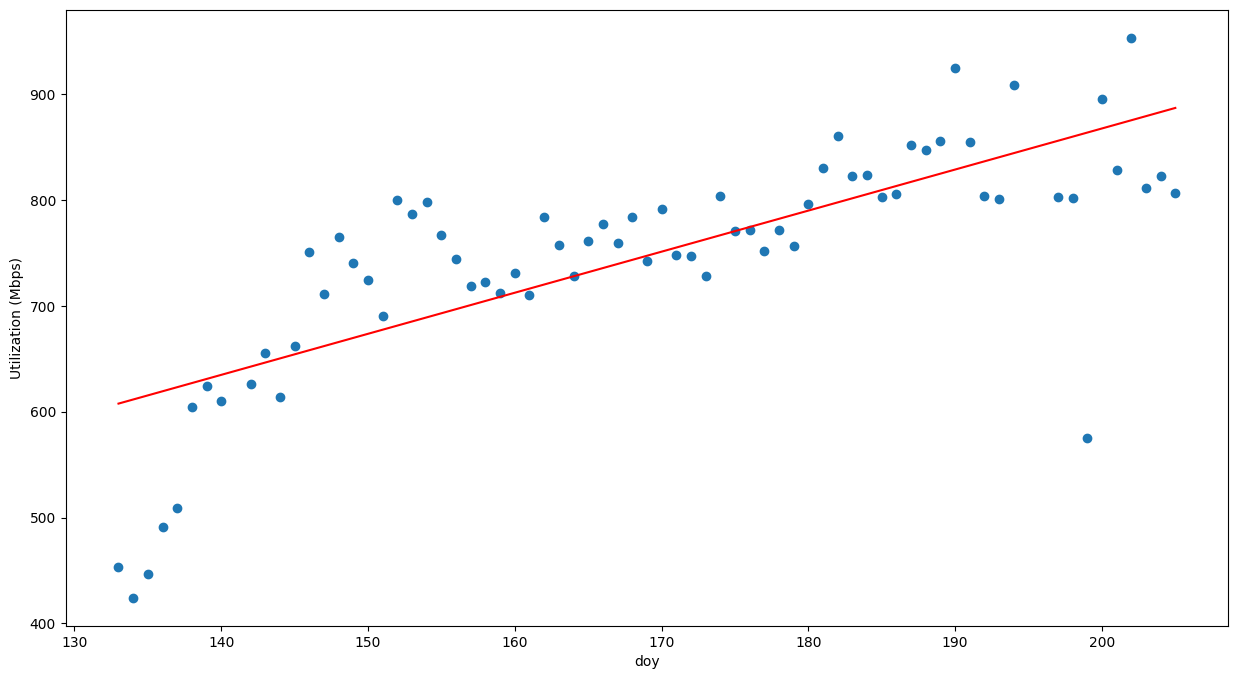

In [51]:
# plot the scatter plot of the data and the regression line

plt.figure(figsize=(15, 8))
plt.scatter(df1['doy'], df1['Utilization'])
plt.plot(df1['doy'], y_pred_1, color='red')
plt.xlabel('doy')
plt.ylabel('Utilization (Mbps)')
plt.show()

# 3. `df2`

In [13]:
df2.head()

,source_node,source_port,source_type,operSpeed,destination_node,destination_port,destination_type,octets,lastOctetval,Octet-diff,Utilization,datetime
0,1002,1/1,spine,40G,401,1/50,leaf,1294836545844880,1288534668453790,6301877391082,556.48,2022-05-13 19:07:34
1,1002,1/1,spine,40G,401,1/50,leaf,1300783379663990,1294836545844880,5946833819112,525.12,2022-05-14 19:07:27
2,1002,1/1,spine,40G,401,1/50,leaf,1305281270436510,1300783379663990,4497890772520,397.18,2022-05-15 19:08:04
3,1002,1/1,spine,40G,401,1/50,leaf,1310806346359800,1305281270436510,5525075923292,487.88,2022-05-16 19:08:05
4,1002,1/1,spine,40G,401,1/50,leaf,1316036666713580,1310806346359800,5230320353784,461.85,2022-05-17 19:08:27


In [15]:
print("The shape of the data is: ", df2.shape)

The shape of the data is:  (70, 12)


In [17]:
df2.columns

Index(['source_node', 'source_port', 'source_type', 'operSpeed',
       'destination_node', 'destination_port', 'destination_type', 'octets',
       'lastOctetval', 'Octet-diff', 'Utilization', 'datetime'],
      dtype='object')

In [23]:
# filter out the dataframe to store only the required columns, i.e. 'datetime' and 'Utilization'

df2 = df2[['datetime', 'Utilization']]

# convert the 'datetime' column to datetime format
df2['datetime'] = pd.to_datetime(df2['datetime'])

df2.head()

,datetime,Utilization
0,2022-05-13 19:07:34,556.48
1,2022-05-14 19:07:27,525.12
2,2022-05-15 19:08:04,397.18
3,2022-05-16 19:08:05,487.88
4,2022-05-17 19:08:27,461.85


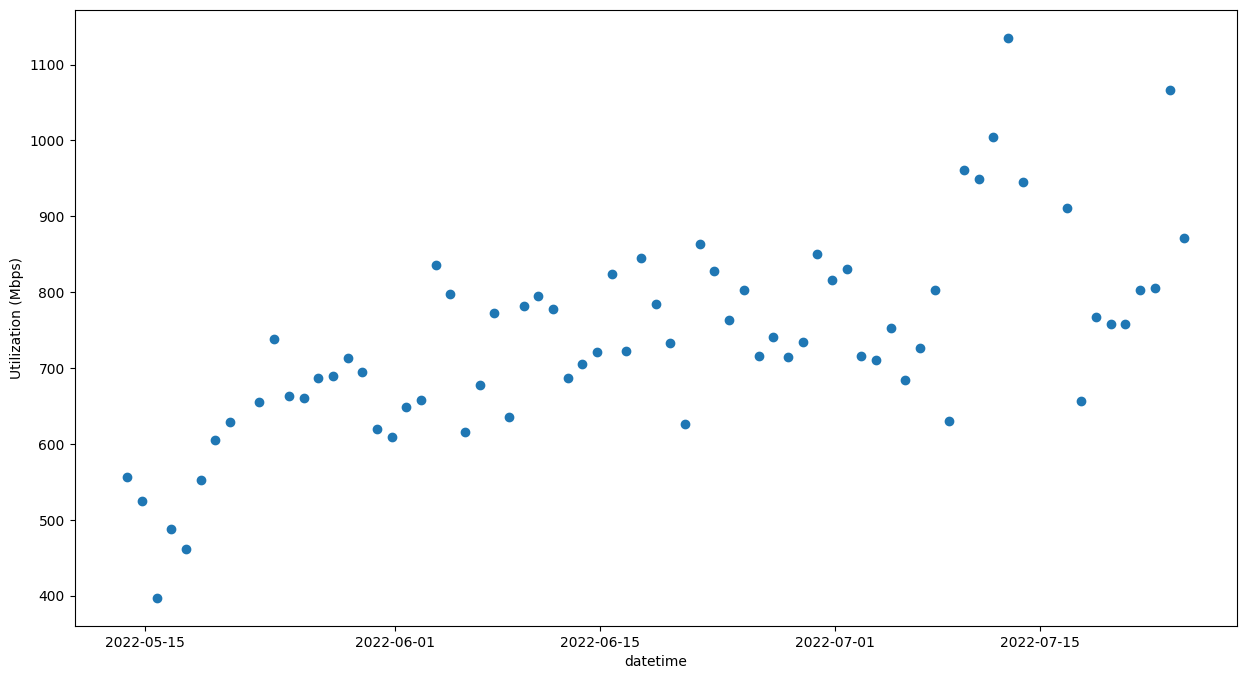

In [52]:
# we first plot the data in a scatter plot ('Utilization' vs 'datetime') to see the trend

plt.figure(figsize=(15, 8))
plt.scatter(df2['datetime'], df2['Utilization'])
plt.xlabel('datetime')
plt.ylabel('Utilization (Mbps)')
plt.show()

Again, the data seems to have a linear trend, `Utilization` seems to be increasing linearly with time. We try to fit a linear regression model to the data by using the current day of the year as independent variable.

## 3.1 Preprocessing

In [53]:
# add a new column 'doy' to represent the day of the year corresponding to the 'datetime' column

df2['doy'] = df2['datetime'].dt.dayofyear

df2.head()

,datetime,Utilization,doy
0,2022-05-13 19:07:34,556.48,133
1,2022-05-14 19:07:27,525.12,134
2,2022-05-15 19:08:04,397.18,135
3,2022-05-16 19:08:05,487.88,136
4,2022-05-17 19:08:27,461.85,137


## 3.2 Linear Regression

In [54]:
model_2 = LinearRegression()

# fit the model on the data
model_2.fit(df2[['doy']], df2['Utilization'])

LinearRegression()

In [55]:
# print the coefficients and intercept of the model

print("The coefficient of the model is: ", model_2.coef_.item())
print("The intercept of the model is: ", model_2.intercept_)

The coefficient of the model is:  4.2788890464944185
The intercept of the model is:  16.531497230477157


## 3.3 Results

In [56]:
# print the R2 Score, MSE and RMSE of the model

y_true_2 = df2['Utilization']
y_pred_2 = model_2.predict(df2[['doy']])

print("The R2 Score of the model is: ", r2_score(y_true_2, y_pred_2))
print("The MSE of the model is: ", mean_squared_error(y_true_2, y_pred_2))
print("The RMSE of the model is: ", mean_squared_error(y_true_2, y_pred_2, squared=False))

The R2 Score of the model is:  0.47150640445992176
The MSE of the model is:  8857.790300111858
The RMSE of the model is:  94.11583448130212


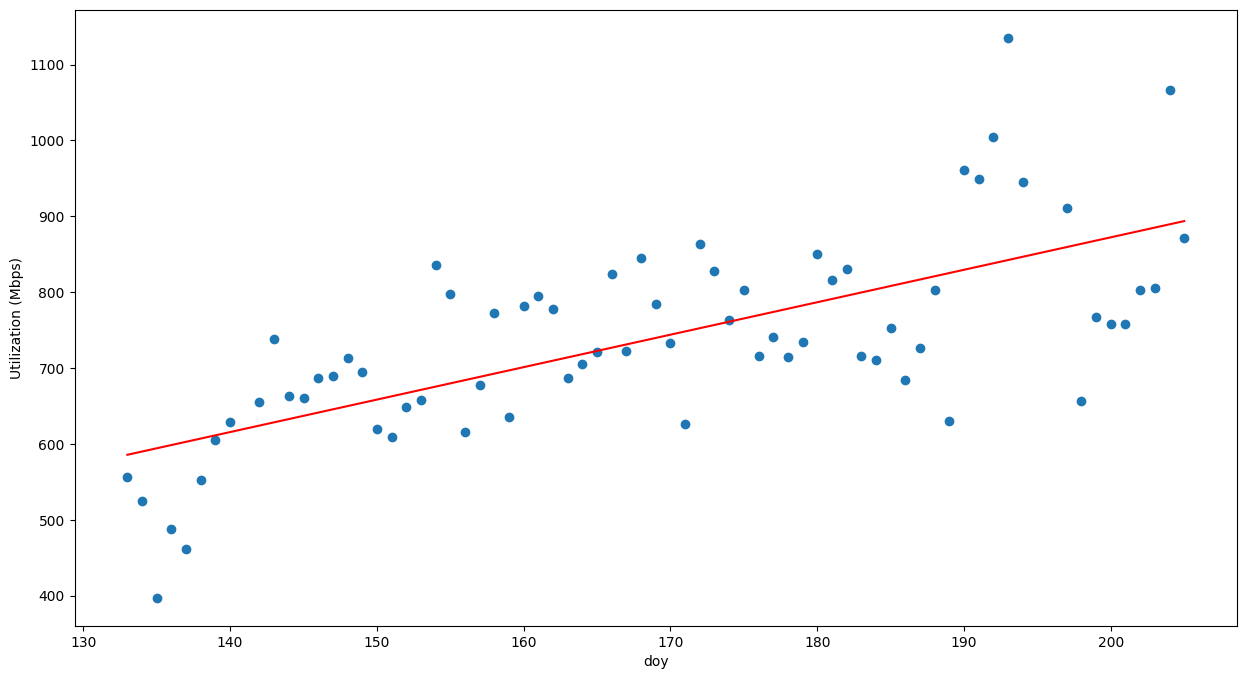

In [57]:
# plot the scatter plot of the data and the regression line

plt.figure(figsize=(15, 8))
plt.scatter(df2['doy'], df2['Utilization'])
plt.plot(df2['doy'], y_pred_2, color='red')
plt.xlabel('doy')
plt.ylabel('Utilization (Mbps)')
plt.show()